# Convenience

This is an example of aneris' `convenience` module. This module doesn't have anywhere near the error checking of aneris' other features, but it does make it slightly simpler to calibrate timeseries and it adds unit handling onto aneris' harmonisation.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import aneris.tutorial
import aneris.convenience

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

We start by loading some dummy data.

In [3]:
model, hist, _ = aneris.tutorial.load_data()
model

,Model,Scenario,Region,Variable,Unit,2005,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,model,sspn,regionc,prefix|Emissions|BC|sector1|suffix,Mt BC/yr,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1,model,sspn,regionc,prefix|Emissions|BC|sector2|suffix,Mt BC/yr,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
2,model,sspn,regionc,prefix|Emissions|BC|suffix,Mt BC/yr,21.0,23.0,25.0,27.0,29.0,31.0,33.0,35.0,37.0,39.0,41.0
3,model,sspn,World,prefix|Emissions|BC|sector1|suffix,Mt BC/yr,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
4,model,sspn,World,prefix|Emissions|BC|sector2|suffix,Mt BC/yr,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
5,model,sspn,World,prefix|Emissions|BC|suffix,Mt BC/yr,21.0,23.0,25.0,27.0,29.0,31.0,33.0,35.0,37.0,39.0,41.0


In [4]:
hist

,Model,Scenario,Region,Variable,Unit,2000,2001,2002,2003,2004,2005
0,History,scen,regiona,prefix|Emissions|BC|sector1|suffix,Mt BC/yr,1,2,3,4,5,6
1,History,scen,regiona,prefix|Emissions|BC|sector2|suffix,Mt BC/yr,2,3,4,5,6,7
2,History,scen,regiona,prefix|Emissions|BC|suffix,Mt BC/yr,3,5,7,9,11,13
3,History,scen,regionb,prefix|Emissions|BC|sector1|suffix,Mt BC/yr,3,4,5,6,7,8
4,History,scen,regionb,prefix|Emissions|BC|sector2|suffix,Mt BC/yr,4,5,6,7,8,9
5,History,scen,regionb,prefix|Emissions|BC|suffix,Mt BC/yr,7,9,11,13,15,17
6,History,scen,World,prefix|Emissions|BC|sector1|suffix,Mt BC/yr,4,6,8,10,12,14
7,History,scen,World,prefix|Emissions|BC|sector2|suffix,Mt BC/yr,6,8,10,12,14,16
8,History,scen,World,prefix|Emissions|BC|suffix,Mt BC/yr,10,14,18,22,26,30


The data must be set up slightly differently to use the convenience methods (it should match the format provided by [scmdata](https://github.com/openscm/scmdata) and [pyam](https://github.com/IAMconsortium/pyam) aka the IAMC style).

In [5]:
def convert_to_iamc_style(inp, idx=("model", "scenario", "region", "variable", "unit")):
    out = inp.copy()
    out.columns = out.columns.str.lower()
    out = out.set_index(list(idx))
    out.columns = out.columns.map(int)
    
    return out

hist_iamc_style = convert_to_iamc_style(hist)
model_iamc_style = convert_to_iamc_style(model)
model_iamc_style

2005  \
model scenario region  variable                           unit             
model sspn     regionc prefix|Emissions|BC|sector1|suffix Mt BC/yr  10.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  11.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  21.0   
               World   prefix|Emissions|BC|sector1|suffix Mt BC/yr  10.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  11.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  21.0   

                                                                    2010  \
model scenario region  variable                           unit             
model sspn     regionc prefix|Emissions|BC|sector1|suffix Mt BC/yr  11.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  12.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  23.0   
               World   prefix|Emissions|BC|sector1|suffix Mt BC/yr  11.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  12.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  23.0   

                                                                    2020  \
model scenario region  variable                           unit             
model sspn     regionc prefix|Emissions|BC|sector1|suffix Mt BC/yr  12.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  13.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  25.0   
               World   prefix|Emissions|BC|sector1|suffix Mt BC/yr  12.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  13.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  25.0   

                                                                    2030  \
model scenario region  variable                           unit             
model sspn     regionc prefix|Emissions|BC|sector1|suffix Mt BC/yr  13.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  14.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  27.0   
               World   prefix|Emissions|BC|sector1|suffix Mt BC/yr  13.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  14.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  27.0   

                                                                    2040  \
model scenario region  variable                           unit             
model sspn     regionc prefix|Emissions|BC|sector1|suffix Mt BC/yr  14.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  15.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  29.0   
               World   prefix|Emissions|BC|sector1|suffix Mt BC/yr  14.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  15.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  29.0   

                                                                    2050  \
model scenario region  variable                           unit             
model sspn     regionc prefix|Emissions|BC|sector1|suffix Mt BC/yr  15.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  16.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  31.0   
               World   prefix|Emissions|BC|sector1|suffix Mt BC/yr  15.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  16.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  31.0   

                                                                    2060  \
model scenario region  variable                           unit             
model sspn     regionc prefix|Emissions|BC|sector1|suffix Mt BC/yr  16.0   
                       prefix|Emissions|BC|sector2|suffix Mt BC/yr  17.0   
                       prefix|Emissions|BC|suffix         Mt BC/yr  33.0   
               World   prefix|Emis

We're also going to only harmonise the World data.

In [6]:
hist_iamc_style = hist_iamc_style[hist_iamc_style.index.get_level_values("region") == "World"]
model_iamc_style = model_iamc_style[model_iamc_style.index.get_level_values("region") == "World"]
model_iamc_style

2005  2010  \
model scenario region variable                           unit                   
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  10.0  11.0   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  11.0  12.0   
                      prefix|Emissions|BC|suffix         Mt BC/yr  21.0  23.0   

                                                                   2020  2030  \
model scenario region variable                           unit                   
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  12.0  13.0   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  13.0  14.0   
                      prefix|Emissions|BC|suffix         Mt BC/yr  25.0  27.0   

                                                                   2040  2050  \
model scenario region variable                           unit                   
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  14.0  15.0   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  15.0  16.0   
                      prefix|Emissions|BC|suffix         Mt BC/yr  29.0  31.0   

                                                                   2060  2070  \
model scenario region variable                           unit                   
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  16.0  17.0   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  17.0  18.0   
                      prefix|Emissions|BC|suffix         Mt BC/yr  33.0  35.0   

                                                                   2080  2090  \
model scenario region variable                           unit                   
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  18.0  19.0   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  19.0  20.0   
                      prefix|Emissions|BC|suffix         Mt BC/yr  37.0  39.0   

                                                                   2100  
model scenario region variable                           unit            
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  20.0  
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  21.0  
                      prefix|Emissions|BC|suffix         Mt BC/yr  41.0

Finally, we alter the units of the historical data.

In [7]:
hist_iamc_style *= 1000
hist_iamc_style.index = hist_iamc_style.index.set_levels(["kt BC / yr"], level="unit")
hist_iamc_style

2000  \
model   scenario region variable                           unit                
History scen     World  prefix|Emissions|BC|sector1|suffix kt BC / yr   4000   
                        prefix|Emissions|BC|sector2|suffix kt BC / yr   6000   
                        prefix|Emissions|BC|suffix         kt BC / yr  10000   

                                                                        2001  \
model   scenario region variable                           unit                
History scen     World  prefix|Emissions|BC|sector1|suffix kt BC / yr   6000   
                        prefix|Emissions|BC|sector2|suffix kt BC / yr   8000   
                        prefix|Emissions|BC|suffix         kt BC / yr  14000   

                                                                        2002  \
model   scenario region variable                           unit                
History scen     World  prefix|Emissions|BC|sector1|suffix kt BC / yr   8000   
                        prefix|Emissions|BC|sector2|suffix kt BC / yr  10000   
                        prefix|Emissions|BC|suffix         kt BC / yr  18000   

                                                                        2003  \
model   scenario region variable                           unit                
History scen     World  prefix|Emissions|BC|sector1|suffix kt BC / yr  10000   
                        prefix|Emissions|BC|sector2|suffix kt BC / yr  12000   
                        prefix|Emissions|BC|suffix         kt BC / yr  22000   

                                                                        2004  \
model   scenario region variable                           unit                
History scen     World  prefix|Emissions|BC|sector1|suffix kt BC / yr  12000   
                        prefix|Emissions|BC|sector2|suffix kt BC / yr  14000   
                        prefix|Emissions|BC|suffix         kt BC / yr  26000   

                                                                        2005  
model   scenario region variable                           unit               
History scen     World  prefix|Emissions|BC|sector1|suffix kt BC / yr  14000  
                        prefix|Emissions|BC|sector2|suffix kt BC / yr  16000  
                        prefix|Emissions|BC|suffix         kt BC / yr  30000

Now we harmonise the data using the convenience methods. Note how the historical data's units have been converted to the input data's units before harmonisation.

In [8]:
model_harmonised = aneris.convenience.harmonise_all(
    scenarios=model_iamc_style,
    history=hist_iamc_style,
    harmonisation_year=2005,
)
model_harmonised

2005  \
model scenario region variable                           unit             
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  14.0   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  16.0   
                      prefix|Emissions|BC|suffix         Mt BC/yr  30.0   

                                                                        2010  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  15.106667   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  17.090909   
                      prefix|Emissions|BC|suffix         Mt BC/yr  32.200000   

                                                                        2020  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  15.840000   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  17.727273   
                      prefix|Emissions|BC|suffix         Mt BC/yr  33.571429   

                                                                        2030  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  16.466667   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  18.242424   
                      prefix|Emissions|BC|suffix         Mt BC/yr  34.714286   

                                                                        2040  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  16.986667   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  18.636364   
                      prefix|Emissions|BC|suffix         Mt BC/yr  35.628571   

                                                                        2050  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  17.400000   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  18.909091   
                      prefix|Emissions|BC|suffix         Mt BC/yr  36.314286   

                                                                        2060  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  17.706667   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  19.060606   
                      prefix|Emissions|BC|suffix         Mt BC/yr  36.771429   

                                                                        2070  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  17.906667   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  19.090909   
                      prefix|Emissions|BC|suffix         Mt BC/yr  37.000000   

                                                                   2080  2090  \
model scenario region variable                           unit                   
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  18.0  19.0   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  19.0  20.0   
                      prefix|Emissions|BC|suffix         Mt BC/yr  37.0  39.0   

                                                                   2100  
model scenario region variable                           unit            
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  20.0  
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  21.0  
                      prefix|Emissions|BC|suffix         Mt BC/yr  41.0

Make a plot to examine (doing this without scmdata/pyam is fiddly).

<AxesSubplot:>

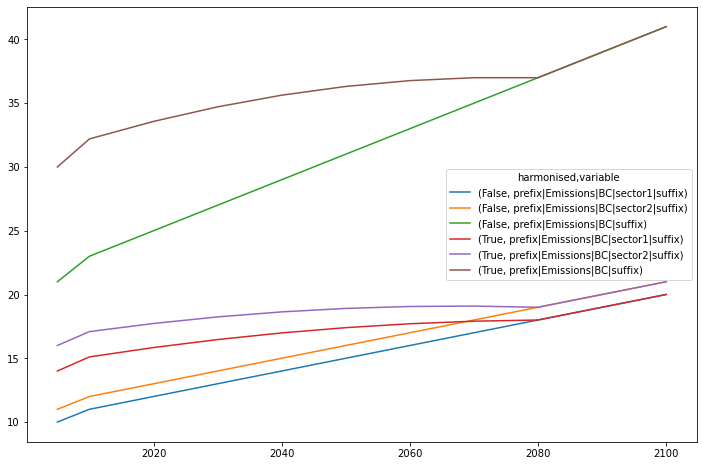

In [9]:
model_iamc_style_pdf = model_iamc_style.copy()
model_iamc_style_pdf["harmonised"] = False

model_harmonised_pdf = model_harmonised.copy()
model_harmonised_pdf["harmonised"] = True

pd.concat([model_iamc_style_pdf, model_harmonised_pdf]).groupby(["harmonised", "variable"]).mean().T.plot()

The above plot makes clear that the default harmonisation method is `reduce_ratio_2080`. We can override this using the `overrides` argument, which takes a pandas DataFrame as input.

In [10]:
overrides = pd.DataFrame([
    {"variable": "prefix|Emissions|BC|suffix", "method": "reduce_offset_2030"},
    {"variable": "prefix|Emissions|BC|sector1|suffix", "method": "reduce_ratio_2100"},
])
overrides

,variable,method
0,prefix|Emissions|BC|suffix,reduce_offset_2030
1,prefix|Emissions|BC|sector1|suffix,reduce_ratio_2100


In [11]:
model_harmonised_overrides = aneris.convenience.harmonise_all(
    scenarios=model_iamc_style,
    history=hist_iamc_style,
    harmonisation_year=2005,
    overrides=overrides
)
model_harmonised_overrides

2005  \
model scenario region variable                           unit             
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  14.0   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  16.0   
                      prefix|Emissions|BC|suffix         Mt BC/yr  30.0   

                                                                        2010  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  15.168421   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  17.090909   
                      prefix|Emissions|BC|suffix         Mt BC/yr  30.200000   

                                                                        2020  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  16.042105   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  17.727273   
                      prefix|Emissions|BC|suffix         Mt BC/yr  28.600000   

                                                                        2030  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  16.831579   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  18.242424   
                      prefix|Emissions|BC|suffix         Mt BC/yr  27.000000   

                                                                        2040  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  17.536842   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  18.636364   
                      prefix|Emissions|BC|suffix         Mt BC/yr  29.000000   

                                                                        2050  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  18.157895   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  18.909091   
                      prefix|Emissions|BC|suffix         Mt BC/yr  31.000000   

                                                                        2060  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  18.694737   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  19.060606   
                      prefix|Emissions|BC|suffix         Mt BC/yr  33.000000   

                                                                        2070  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  19.147368   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  19.090909   
                      prefix|Emissions|BC|suffix         Mt BC/yr  35.000000   

                                                                        2080  \
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  19.515789   
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  19.000000   
                      prefix|Emissions|BC|suffix         Mt BC/yr  37.000000   

                                                                   2090  2100  
model scenario region variable                           unit                  
model sspn     World  prefix|Emissions|BC|sector1|suffix Mt BC/yr  19.8  20.0  
                      prefix|Emissions|BC|sector2|suffix Mt BC/yr  20.0  21.0  
                      prefix|Emissions|BC|suffix         Mt BC/yr  39.0  41.0

A quick plot shows the change in output as a result of overriding the method.

<AxesSubplot:>

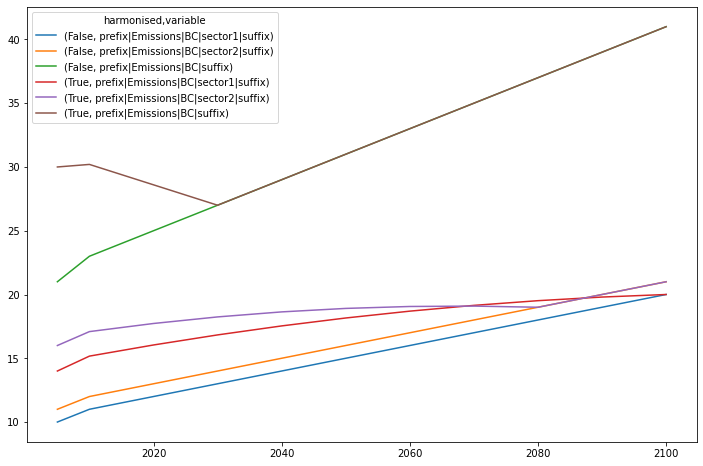

In [12]:
model_iamc_style_pdf = model_iamc_style.copy()
model_iamc_style_pdf["harmonised"] = False

model_harmonised_overrides_pdf = model_harmonised_overrides.copy()
model_harmonised_overrides_pdf["harmonised"] = True

pd.concat([model_iamc_style_pdf, model_harmonised_overrides_pdf]).groupby(["harmonised", "variable"]).mean().T.plot()

It should be noted that the sectoral sum is no longer valid. The convenience methods do not include the sectoral sum checks that aneris' other methods do. They are designed for a quick way to harmonise timeseries without all the extra checks. The extra checks are only provided by aneris' other interfaces.